In [34]:
# from google.colab import drive
# drive.mount('/content/drive')

In [35]:
import pandas as pd
# 데이터 가져오기
data = pd.read_csv('review_df.csv')
data

,Unnamed: 0,Date,title,stock price fluctuations,compound,neg,neu,pos,sent_score,blob_score,norm_score
0,0,20210101,Book Village Corporate personal Let s prepa...,1,0.9334,0.070,0.837,0.093,Negative,0.067375,0.234295
1,1,20210102,Suspension of Harimgak a famous Chinese resta...,1,0.9829,0.032,0.787,0.181,Negative,0.216957,0.245986
2,2,20210103,Only out of companies that have reduced g...,1,0.9914,0.065,0.833,0.102,Negative,0.033373,0.247983
3,3,20210104,Bernanke The US economy recovers faster than...,1,0.9999,0.044,0.769,0.187,Positive,0.112029,0.249977
4,4,20210105,The government releases tons of stockp...,0,0.9999,0.056,0.759,0.186,Positive,0.104161,0.249977
...,...,...,...,...,...,...,...,...,...,...,...
360,360,20211227,million won Bitcoin million won in the ...,1,0.9998,0.059,0.770,0.170,Neutral,0.066644,0.249953
361,361,20211228,Ants sell Samsung Electronics billion won ...,0,0.9995,0.052,0.806,0.142,Neutral,0.106832,0.249883
362,362,20211229,of serious accidents happen in the constr...,0,0.9998,0.060,0.777,0.163,Neutral,0.085426,0.249953
363,363,20211230,Independent management of SK Intel NAND We ...,0,0.9999,0.083,0.714,0.203,Positive,0.082016,0.249977


In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
# data.set_index('Date', inplace = True)

## **AdaBoosting**

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [39]:
data.head()

,Unnamed: 0,Date,title,stock price fluctuations,compound,neg,neu,pos,sent_score,blob_score,norm_score
0,0,20210101,Book Village Corporate personal Let s prepa...,1,0.9334,0.070,0.837,0.093,Negative,0.067375,0.234295
1,1,20210102,Suspension of Harimgak a famous Chinese resta...,1,0.9829,0.032,0.787,0.181,Negative,0.216957,0.245986
2,2,20210103,Only out of companies that have reduced g...,1,0.9914,0.065,0.833,0.102,Negative,0.033373,0.247983
3,3,20210104,Bernanke The US economy recovers faster than...,1,0.9999,0.044,0.769,0.187,Positive,0.112029,0.249977
4,4,20210105,The government releases tons of stockp...,0,0.9999,0.056,0.759,0.186,Positive,0.104161,0.249977


In [40]:
# data.drop(['Unnamed: 0', 'title'], axis = 1, inplace = True)
data

,Unnamed: 0,Date,title,stock price fluctuations,compound,neg,neu,pos,sent_score,blob_score,norm_score
0,0,20210101,Book Village Corporate personal Let s prepa...,1,0.9334,0.070,0.837,0.093,Negative,0.067375,0.234295
1,1,20210102,Suspension of Harimgak a famous Chinese resta...,1,0.9829,0.032,0.787,0.181,Negative,0.216957,0.245986
2,2,20210103,Only out of companies that have reduced g...,1,0.9914,0.065,0.833,0.102,Negative,0.033373,0.247983
3,3,20210104,Bernanke The US economy recovers faster than...,1,0.9999,0.044,0.769,0.187,Positive,0.112029,0.249977
4,4,20210105,The government releases tons of stockp...,0,0.9999,0.056,0.759,0.186,Positive,0.104161,0.249977
...,...,...,...,...,...,...,...,...,...,...,...
360,360,20211227,million won Bitcoin million won in the ...,1,0.9998,0.059,0.770,0.170,Neutral,0.066644,0.249953
361,361,20211228,Ants sell Samsung Electronics billion won ...,0,0.9995,0.052,0.806,0.142,Neutral,0.106832,0.249883
362,362,20211229,of serious accidents happen in the constr...,0,0.9998,0.060,0.777,0.163,Neutral,0.085426,0.249953
363,363,20211230,Independent management of SK Intel NAND We ...,0,0.9999,0.083,0.714,0.203,Positive,0.082016,0.249977


In [41]:
data1 = pd.read_csv('final_data_new.csv')
data1

,Date,compound,neg,neu,pos,Open,High,Low,Close,Volume
0,20210104,0.9999,0.043,0.807,0.149,819000.0,838000.0,804000.0,829000.0,182864
1,20210105,0.9999,0.044,0.796,0.160,825000.0,834000.0,818000.0,832000.0,119911
2,20210106,0.9998,0.054,0.807,0.140,828000.0,837000.0,816000.0,817000.0,145873
3,20210107,0.9998,0.044,0.793,0.163,824000.0,824000.0,816000.0,819000.0,116480
4,20210108,0.9995,0.065,0.793,0.142,821000.0,840000.0,815000.0,837000.0,263860
...,...,...,...,...,...,...,...,...,...,...
243,20211224,0.9993,0.033,0.814,0.153,896000.0,903000.0,885000.0,885000.0,49424
244,20211227,0.9997,0.053,0.794,0.153,885000.0,897000.0,885000.0,886000.0,57185
245,20211228,0.9994,0.051,0.818,0.132,891000.0,893000.0,883000.0,891000.0,90833
246,20211229,0.9996,0.055,0.805,0.139,899000.0,905000.0,884000.0,890000.0,71560


In [42]:
data1.drop(['compound', 'neg', 'neu', 'pos', 'Open', 'High', 'Low', 'Volume'], axis = 1, inplace = True)
data1

,Date,Close
0,20210104,829000.0
1,20210105,832000.0
2,20210106,817000.0
3,20210107,819000.0
4,20210108,837000.0
...,...,...
243,20211224,885000.0
244,20211227,886000.0
245,20211228,891000.0
246,20211229,890000.0


In [44]:
# data1['Close'] = data1['Close']*800000
# data1
data

,Unnamed: 0,Date,title,stock price fluctuations,compound,neg,neu,pos,sent_score,blob_score,norm_score
0,0,20210101,Book Village Corporate personal Let s prepa...,1,0.9334,0.070,0.837,0.093,Negative,0.067375,0.234295
1,1,20210102,Suspension of Harimgak a famous Chinese resta...,1,0.9829,0.032,0.787,0.181,Negative,0.216957,0.245986
2,2,20210103,Only out of companies that have reduced g...,1,0.9914,0.065,0.833,0.102,Negative,0.033373,0.247983
3,3,20210104,Bernanke The US economy recovers faster than...,1,0.9999,0.044,0.769,0.187,Positive,0.112029,0.249977
4,4,20210105,The government releases tons of stockp...,0,0.9999,0.056,0.759,0.186,Positive,0.104161,0.249977
...,...,...,...,...,...,...,...,...,...,...,...
360,360,20211227,million won Bitcoin million won in the ...,1,0.9998,0.059,0.770,0.170,Neutral,0.066644,0.249953
361,361,20211228,Ants sell Samsung Electronics billion won ...,0,0.9995,0.052,0.806,0.142,Neutral,0.106832,0.249883
362,362,20211229,of serious accidents happen in the constr...,0,0.9998,0.060,0.777,0.163,Neutral,0.085426,0.249953
363,363,20211230,Independent management of SK Intel NAND We ...,0,0.9999,0.083,0.714,0.203,Positive,0.082016,0.249977


In [45]:
data.drop(['Unnamed: 0', 'title', 'compound', 'neg', 'pos', 'neu'], axis=1, inplace=True)
data

,Date,stock price fluctuations,sent_score,blob_score,norm_score
0,20210101,1,Negative,0.067375,0.234295
1,20210102,1,Negative,0.216957,0.245986
2,20210103,1,Negative,0.033373,0.247983
3,20210104,1,Positive,0.112029,0.249977
4,20210105,0,Positive,0.104161,0.249977
...,...,...,...,...,...
360,20211227,1,Neutral,0.066644,0.249953
361,20211228,0,Neutral,0.106832,0.249883
362,20211229,0,Neutral,0.085426,0.249953
363,20211230,0,Positive,0.082016,0.249977


In [46]:
data1

,Date,Close
0,20210104,829000.0
1,20210105,832000.0
2,20210106,817000.0
3,20210107,819000.0
4,20210108,837000.0
...,...,...
243,20211224,885000.0
244,20211227,886000.0
245,20211228,891000.0
246,20211229,890000.0


In [48]:
data2 = data.merge(data1, on='Date', how='outer')
data2

,Date,stock price fluctuations,sent_score,blob_score,norm_score,Close
0,20210101,1,Negative,0.067375,0.234295,NaN
1,20210102,1,Negative,0.216957,0.245986,NaN
2,20210103,1,Negative,0.033373,0.247983,NaN
3,20210104,1,Positive,0.112029,0.249977,829000.0
4,20210105,0,Positive,0.104161,0.249977,832000.0
...,...,...,...,...,...,...
360,20211227,1,Neutral,0.066644,0.249953,886000.0
361,20211228,0,Neutral,0.106832,0.249883,891000.0
362,20211229,0,Neutral,0.085426,0.249953,890000.0
363,20211230,0,Positive,0.082016,0.249977,903000.0


In [49]:
data2 = data2.dropna()

In [50]:
# data2['Close'] = data2['Close']/800000
data2

,Date,stock price fluctuations,sent_score,blob_score,norm_score,Close
3,20210104,1,Positive,0.112029,0.249977,829000.0
4,20210105,0,Positive,0.104161,0.249977,832000.0
5,20210106,1,Neutral,0.062322,0.249953,817000.0
6,20210107,1,Neutral,0.103625,0.249953,819000.0
7,20210108,0,Neutral,0.072140,0.249930,837000.0
...,...,...,...,...,...,...
357,20211224,0,Neutral,0.086201,0.249859,885000.0
360,20211227,1,Neutral,0.066644,0.249953,886000.0
361,20211228,0,Neutral,0.106832,0.249883,891000.0
362,20211229,0,Neutral,0.085426,0.249953,890000.0


In [51]:
data2.to_csv('sent_score_final.csv', encoding='utf-8')

In [19]:
# data2['sent_score'] = data2['sent_score']*800000
# data2

,Date,sent_score,Close
3,20210104,800000,829000.0
4,20210105,0,832000.0
5,20210106,800000,817000.0
6,20210107,800000,819000.0
7,20210108,0,837000.0
...,...,...,...
357,20211224,0,885000.0
360,20211227,800000,886000.0
361,20211228,0,891000.0
362,20211229,0,890000.0


In [52]:
data2.set_index('Date', inplace=True)

In [53]:
data2

,stock price fluctuations,sent_score,blob_score,norm_score,Close
Date,,,,,
20210104,1,Positive,0.112029,0.249977,829000.0
20210105,0,Positive,0.104161,0.249977,832000.0
20210106,1,Neutral,0.062322,0.249953,817000.0
20210107,1,Neutral,0.103625,0.249953,819000.0
20210108,0,Neutral,0.072140,0.249930,837000.0
...,...,...,...,...,...
20211224,0,Neutral,0.086201,0.249859,885000.0
20211227,1,Neutral,0.066644,0.249953,886000.0
20211228,0,Neutral,0.106832,0.249883,891000.0


In [54]:
feature_columns = list(data2.columns.difference(['Close']))
# feature_columns

X = data2['blob_score']
y = data2['Close']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(198,) (50,) (198,) (50,)


### 학습

In [57]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [58]:
# 학습 데이터를 에이다부스트 모형에 적합 후 평가 데이터로 검증
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regr1 = AdaBoostClassifier(n_estimators=300, random_state=0)
regr1.fit(X_train, y_train)
pred1 = regr1.predict(X_test)

regr2 = DecisionTreeClassifier(max_depth=4)
regr2.fit(X_train, y_train)
pred2 = regr2.predict(X_test)

print(mean_squared_error(y_test, pred1), mean_squared_error(y_test, pred2))
print('r2:', r2_score(y_test, pred1), r2_score(y_test, pred2))

5820160000.0 7240560000.0
r2: -0.5381491194047665 -0.9135317565148338


In [59]:
regr1.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=300, random_state=0)

In [60]:
len(y_test)

50

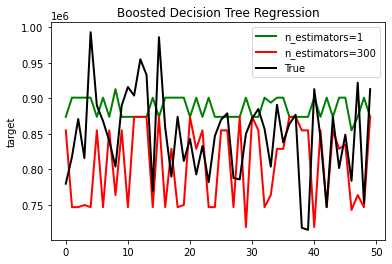

In [61]:
import matplotlib.pyplot as plt

plt.figure()
x = np.arange(len(pred1))
# plt.scatter(y_train, c="k", label="training samples")
plt.plot(x,pred1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(x,pred2, c="r", label="n_estimators=300", linewidth=2)
plt.plot(x,y_test, c='k', label="True", linewidth=2)
# plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

AttributeError: 'Line2D' object has no property 's'

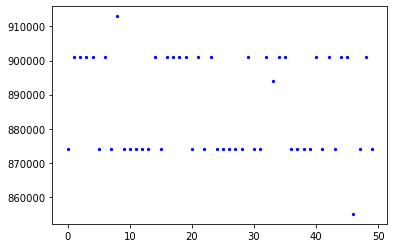

In [67]:
x_ax = range(len(y_test))
plt.scatter(x_ax, pred1, s=5, color="blue", label="original")
plt.plot(x_ax, y_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [68]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [69]:
# k-fold cross validataion 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, pred1, y_test, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

NameError: name 'ada_reg' is not defined

# CatBoostRegressor

In [ ]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas>=0.24.0 in c:\users\ym\anaconda3\lib\site-packages (from catboost) (1.3.4)



In [70]:
from catboost import CatBoostRegressor
from catboost.utils import eval_metric

booster = CatBoostRegressor(iterations=100, verbose=10)

booster.fit(X_train, y_train, eval_set=(X_test, y_test))
booster.set_feature_names(feature_columns)

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 : %.2f"%booster.score(X_test, y_test))
print("Train R2 : %.2f"%booster.score(X_train, y_train))

Learning rate set to 0.160869
0:	learn: 66458.6177707	test: 61573.3447880	best: 61573.3447880 (0)	total: 147ms	remaining: 14.6s
10:	learn: 63505.3758863	test: 63533.0105322	best: 61525.8474131 (1)	total: 153ms	remaining: 1.24s
20:	learn: 61905.7111724	test: 64670.9695658	best: 61525.8474131 (1)	total: 157ms	remaining: 592ms
30:	learn: 59671.4976182	test: 67059.9967227	best: 61525.8474131 (1)	total: 162ms	remaining: 361ms
40:	learn: 57896.5334886	test: 67849.6596697	best: 61525.8474131 (1)	total: 167ms	remaining: 240ms
50:	learn: 56188.7673770	test: 69234.7630857	best: 61525.8474131 (1)	total: 172ms	remaining: 165ms
60:	learn: 54270.1031624	test: 70555.7389476	best: 61525.8474131 (1)	total: 176ms	remaining: 113ms
70:	learn: 52784.4030527	test: 70851.4703247	best: 61525.8474131 (1)	total: 181ms	remaining: 74ms
80:	learn: 51420.5647451	test: 71238.5659983	best: 61525.8474131 (1)	total: 187ms	remaining: 43.8ms
90:	learn: 50102.1497849	test: 71709.8108991	best: 61525.8474131 (1)	total: 192m

In [71]:
booster = CatBoostRegressor()

params = {
            'iterations':[100,500],
            'learning_rate':[0.01, 0.1],
            'verbose':[0.1,10],
            'bootstrap_type':['Bayesian', 'No']
}

search_results = booster.grid_search(params, X_train, y_train, cv=5, )

print("\nBest Params : ", search_results['params'])

0:	learn: 841522.9567565	test: 853448.8168134	best: 853448.8168134 (0)	total: 586us	remaining: 58ms
10:	learn: 768374.9268068	test: 781143.0091867	best: 781143.0091867 (10)	total: 5.02ms	remaining: 40.6ms
20:	learn: 702806.4805812	test: 716514.1344893	best: 716514.1344893 (20)	total: 9.96ms	remaining: 37.5ms
30:	learn: 642202.0134764	test: 656656.2596950	best: 656656.2596950 (30)	total: 14.3ms	remaining: 31.8ms
40:	learn: 587069.0918436	test: 602328.9912680	best: 602328.9912680 (40)	total: 18.5ms	remaining: 26.7ms
50:	learn: 536180.0709819	test: 553125.2257637	best: 553125.2257637 (50)	total: 22.3ms	remaining: 21.5ms
60:	learn: 490004.1170449	test: 508076.4362649	best: 508076.4362649 (60)	total: 26.2ms	remaining: 16.8ms
70:	learn: 448561.5486847	test: 467505.0526106	best: 467505.0526106 (70)	total: 31ms	remaining: 12.7ms
80:	learn: 410471.2075789	test: 429808.5168610	best: 429808.5168610 (80)	total: 35.1ms	remaining: 8.24ms
90:	learn: 375416.7515867	test: 395655.8970701	best: 395655.89

360:	learn: 70440.8948319	test: 93480.6410571	best: 93480.6410571 (360)	total: 160ms	remaining: 61.5ms
370:	learn: 69096.0994969	test: 91884.6118527	best: 91884.6118527 (370)	total: 165ms	remaining: 57.3ms
380:	learn: 67957.1852182	test: 90415.8516823	best: 90415.8516823 (380)	total: 170ms	remaining: 53ms
390:	learn: 66964.8861956	test: 89129.0409779	best: 89129.0409779 (390)	total: 175ms	remaining: 48.7ms
400:	learn: 66066.3108439	test: 88030.9723887	best: 88030.9723887 (400)	total: 179ms	remaining: 44.3ms
410:	learn: 65308.9871239	test: 87005.9602700	best: 87005.9602700 (410)	total: 184ms	remaining: 39.8ms
420:	learn: 64663.2693602	test: 86096.4150263	best: 86096.4150263 (420)	total: 189ms	remaining: 35.4ms
430:	learn: 64088.6996773	test: 85242.0521936	best: 85242.0521936 (430)	total: 193ms	remaining: 31ms
440:	learn: 63583.6225530	test: 84539.6189088	best: 84539.6189088 (440)	total: 198ms	remaining: 26.5ms
450:	learn: 63124.5828172	test: 83838.0221459	best: 83838.0221459 (450)	total

120:	learn: 50799.3161104	test: 75439.0364423	best: 74580.5920322 (107)	total: 59.4ms	remaining: 186ms
130:	learn: 49587.6735068	test: 75182.4562729	best: 74580.5920322 (107)	total: 64.9ms	remaining: 183ms
140:	learn: 48450.6895741	test: 75463.2427263	best: 74580.5920322 (107)	total: 69.9ms	remaining: 178ms
150:	learn: 47434.1216558	test: 75596.2699932	best: 74580.5920322 (107)	total: 75ms	remaining: 173ms
160:	learn: 46548.0697791	test: 75898.6244030	best: 74580.5920322 (107)	total: 80.4ms	remaining: 169ms
170:	learn: 45649.2553364	test: 75717.3573771	best: 74580.5920322 (107)	total: 85.3ms	remaining: 164ms
180:	learn: 44662.8966198	test: 75819.1928332	best: 74580.5920322 (107)	total: 90.1ms	remaining: 159ms
190:	learn: 43791.1970423	test: 76066.7984641	best: 74580.5920322 (107)	total: 94.9ms	remaining: 153ms
200:	learn: 43243.1937763	test: 76375.3677230	best: 74580.5920322 (107)	total: 99.7ms	remaining: 148ms
210:	learn: 42557.2223644	test: 76421.5701124	best: 74580.5920322 (107)	tot

140:	learn: 48027.0863743	test: 75157.4333581	best: 69583.2262281 (53)	total: 62.4ms	remaining: 159ms
150:	learn: 47043.5603679	test: 75326.6672292	best: 69583.2262281 (53)	total: 66.8ms	remaining: 154ms
160:	learn: 46031.5751001	test: 75819.9168606	best: 69583.2262281 (53)	total: 71.1ms	remaining: 150ms
170:	learn: 45069.1822246	test: 75936.3148967	best: 69583.2262281 (53)	total: 75.5ms	remaining: 145ms
180:	learn: 44215.9497736	test: 76373.1286504	best: 69583.2262281 (53)	total: 80ms	remaining: 141ms
190:	learn: 43453.3792826	test: 76685.9509163	best: 69583.2262281 (53)	total: 84.2ms	remaining: 136ms
200:	learn: 42631.1519962	test: 76756.4800452	best: 69583.2262281 (53)	total: 88.4ms	remaining: 131ms
210:	learn: 41898.7045696	test: 76718.5005744	best: 69583.2262281 (53)	total: 92.5ms	remaining: 127ms
220:	learn: 41119.5499451	test: 77466.8167542	best: 69583.2262281 (53)	total: 96.7ms	remaining: 122ms
230:	learn: 40422.7462064	test: 78031.4561618	best: 69583.2262281 (53)	total: 101ms	

300:	learn: 39994.8943623	test: 74965.2610525	best: 69581.7127076 (50)	total: 126ms	remaining: 83.3ms
310:	learn: 39443.3744194	test: 74939.7055560	best: 69581.7127076 (50)	total: 130ms	remaining: 79.3ms
320:	learn: 39011.4692475	test: 75023.5978610	best: 69581.7127076 (50)	total: 135ms	remaining: 75.2ms
330:	learn: 38595.0409316	test: 75052.3659213	best: 69581.7127076 (50)	total: 139ms	remaining: 71.1ms
340:	learn: 38080.4115946	test: 75145.9722014	best: 69581.7127076 (50)	total: 143ms	remaining: 66.9ms
350:	learn: 37598.7786639	test: 75440.1213501	best: 69581.7127076 (50)	total: 148ms	remaining: 62.6ms
360:	learn: 37145.1109792	test: 75384.8084820	best: 69581.7127076 (50)	total: 152ms	remaining: 58.4ms
370:	learn: 36740.6435591	test: 75888.7917490	best: 69581.7127076 (50)	total: 156ms	remaining: 54.3ms
380:	learn: 36336.3717777	test: 75989.8316761	best: 69581.7127076 (50)	total: 160ms	remaining: 50ms
390:	learn: 35932.1404162	test: 76128.2597869	best: 69581.7127076 (50)	total: 164ms	

460:	learn: 31085.3751082	test: 77734.2363387	best: 76612.5189320 (172)	total: 195ms	remaining: 16.5ms
470:	learn: 30735.0135085	test: 77939.9580997	best: 76612.5189320 (172)	total: 199ms	remaining: 12.3ms
480:	learn: 30446.0197466	test: 77975.5399950	best: 76612.5189320 (172)	total: 203ms	remaining: 8.03ms
490:	learn: 30092.0278175	test: 78324.6857716	best: 76612.5189320 (172)	total: 208ms	remaining: 3.81ms
499:	learn: 29804.4064979	test: 78395.9614739	best: 76612.5189320 (172)	total: 211ms	remaining: 0us

bestTest = 76612.51893
bestIteration = 172


Best Params :  {'verbose': 10, 'iterations': 500, 'learning_rate': 0.1, 'bootstrap_type': 'Bayesian'}


In [72]:
booster = CatBoostRegressor(iterations=500, verbose=10, learning_rate= 0.1, bootstrap_type= 'No')

booster.fit(X_train, y_train, eval_set=(X_test, y_test))
booster.set_feature_names(feature_columns)

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 : %.2f"%booster.score(X_test, y_test))
print("Train R2 : %.2f"%booster.score(X_train, y_train))

0:	learn: 67083.8785723	test: 61559.9584440	best: 61559.9584440 (0)	total: 565us	remaining: 282ms
10:	learn: 64263.1835221	test: 61982.7879859	best: 61296.1308178 (2)	total: 5.4ms	remaining: 240ms
20:	learn: 62972.8973364	test: 62263.2592787	best: 61296.1308178 (2)	total: 14.9ms	remaining: 339ms
30:	learn: 61606.3419979	test: 63415.7286726	best: 61296.1308178 (2)	total: 19.7ms	remaining: 298ms
40:	learn: 60703.9724124	test: 64220.8504683	best: 61296.1308178 (2)	total: 24.3ms	remaining: 271ms
50:	learn: 59913.1240492	test: 64542.8317093	best: 61296.1308178 (2)	total: 29.1ms	remaining: 256ms
60:	learn: 58803.4875013	test: 64274.9665580	best: 61296.1308178 (2)	total: 34.5ms	remaining: 248ms
70:	learn: 57480.1047680	test: 64788.8434989	best: 61296.1308178 (2)	total: 39.1ms	remaining: 236ms
80:	learn: 56554.7586988	test: 65065.1625918	best: 61296.1308178 (2)	total: 43.9ms	remaining: 227ms
90:	learn: 55655.6288751	test: 65401.9744663	best: 61296.1308178 (2)	total: 48.3ms	remaining: 217ms
100

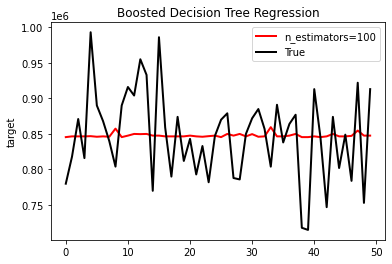

In [74]:
import matplotlib.pyplot as plt

x = np.arange(len(y_test))
plt.figure()
# plt.scatter(y_train, c="k", label="training samples")
plt.plot(x,test_preds, c="r", label="n_estimators=100", linewidth=2)
plt.plot(x,y_test, c='k', label="True", linewidth=2)
# plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()